#Projeto 3 - Extração de características e classificação de folhas de uva - Grapevine Leaves Image Dataset
**Entrega**

O projeto deve ser entregue até o domingo da 4ª semana de aula, envie o link do GitHub ou HTML na atividade no Moodle.

O prazo máximo é segunda-feira da 4ª semana de aula, valendo 20% a menos da nota.

**Dados do Certificado**

Linguagem: Python

Tecnologias: Pandas, Numpy, Tensorflow, Keras, PIL, 

Matplotlib e Sklearn

Carga horária: 12 horas

**Grapevine Leaves Image Dataset - Kaggle**
Este é um conjunto de dados de imagens de folhas de uva. A análise das espécies de folhas de uva são importantes para determinar o preço e o sabor. Encontrar as características a partir de uma folha pode auxiliar a saber o valor e a qualidade de uma safra.

**Preparação do ambiente**

Faça o download e carregue o dataset Grapevine Leaves Image Dataset.

#Exercícios
1. Questão 1) Escolha uma rede pré-treinada em imagens para fazer transferência de aprendizado por meio de fine-tuning (2,5 pontos):
- a) Determine quais camadas serão acrescentadas, o tamanho do batch, a quantidade de épocas e a forma de treinamento (fit ou train_on_batch) (2 pontos).
- b) Compare a predição diretamente pela rede com a extração de características (0,5 ponto).
2. Questão 2) Considerando a mesma rede pré-treinada do exercício anterior, faça fine-tuning congelando algumas camadas. Determine a quantidade de camadas a serem congeladas, indique o setup escolhido e compare o resultado obtido em relação ao fine-tuning convencional. (2,5 pontos)
3. Questão 3) Considerando a mesma rede pré-treinada do primeiro exercício, faça fine-tuning com Data Augmentation. Explore essas técnicas e verifique se sua utilização melhora a performance do modelo. Não fique restrito às técnicas de exemplo. Estude as demais funções existentes no pacote ImageGenerator. (2,5 pontos)
4. Questão 4) Interpretação dos resultados (2,5 pontos):

(fazer um gráfico dos resultados das epocas)

- a) Baseando-se nos experimetnos anteriores, indique a melhor solução para este conjunto de dados.
- b) Apresente gráficos e dados comparativos que justifiquem suas escolhas.

In [ ]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import zipfile

from keras.datasets import cifar10
from keras.layers import Dense, Flatten
from keras.models import Model, Sequential, load_model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import resnet50, VGG19, ResNet50V2

from keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

In [ ]:
imgzip_Ak = zipfile.ZipFile("/content/Ak.zip")
I_Ak = imgzip_Ak.infolist()
imgzip_Ala_Idris = zipfile.ZipFile("/content/Ala_Idris.zip")
I_Ala_Idris = imgzip_Ala_Idris.infolist()
imgzip_Buzgulu = zipfile.ZipFile("/content/Buzgulu.zip")
I_Buzgulu = imgzip_Buzgulu.infolist()
imgzip_Dimnit = zipfile.ZipFile("/content/Dimnit.zip")
I_Dimnit = imgzip_Dimnit.infolist()
imgzip_Nazli = zipfile.ZipFile("/content/Nazli.zip")
I_Nazli = imgzip_Nazli.infolist()

Essa será a legenda usada para os nossos rótulos, cada número faz referência a um tipo de folha de uva, confome lista abaixo:

Ak - 0

Ala_Idris - 1

Buzgulu - 2

Dimnit - 3

Nazli - 4

In [ ]:
img_w, img_h = 224, 224
X = []
y = []

Esta função abaixo será utilizada para fazer a leitura das imagens, elas foram carregadas em 'zip' para melhorar o processamento.

In [ ]:
def openzip(imagem1,imagem2,rotulo):
  for f in imagem1:
    ifile = imagem2.open(f)
    img_b = Image.open(ifile).convert('RGB')
    img = img_b.resize((img_w,img_h))
    X.append(np.asarray(img))
    y.append(rotulo)
  print(img_b)
  print(img)


In [ ]:
openzip(I_Ak,imgzip_Ak,0)
openzip(I_Ala_Idris,imgzip_Ala_Idris,1)
openzip(I_Buzgulu,imgzip_Buzgulu,2)
openzip(I_Dimnit,imgzip_Dimnit,3)
openzip(I_Nazli,imgzip_Nazli,4)

<PIL.Image.Image image mode=RGB size=511x511 at 0x7FA3FCC7F490>
<PIL.Image.Image image mode=RGB size=224x224 at 0x7FA3E3269810>
<PIL.Image.Image image mode=RGB size=511x511 at 0x7FA3E31DDD10>
<PIL.Image.Image image mode=RGB size=224x224 at 0x7FA3E3269890>
<PIL.Image.Image image mode=RGB size=511x511 at 0x7FA3E31EA790>
<PIL.Image.Image image mode=RGB size=224x224 at 0x7FA3E32BCA10>
<PIL.Image.Image image mode=RGB size=511x511 at 0x7FA3E31EA790>
<PIL.Image.Image image mode=RGB size=224x224 at 0x7FA3FCC7F490>
<PIL.Image.Image image mode=RGB size=511x511 at 0x7FA3E31DDC10>
<PIL.Image.Image image mode=RGB size=224x224 at 0x7FA3E32A9E10>


In [ ]:
X = np.array(X)
X.shape

(500, 224, 224, 3)

In [ ]:
y = np.array(y)
y.shape

(500,)

In [ ]:
import collections
collections.Counter(y)

Counter({0: 100, 1: 100, 2: 100, 3: 100, 4: 100})

In [ ]:
# Separar o dado em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=10)

In [ ]:
y_test.shape

(100,)

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print('\tTraining set shape: ', X_train.shape)
print('\tTesting set shape: ', X_test.shape)
print('\tTraining label shape: ', y_train.shape)
print('\tTesting label shape: ', y_test.shape)

	Training set shape:  (400, 224, 224, 3)
	Testing set shape:  (100, 224, 224, 3)
	Training label shape:  (400, 5)
	Testing label shape:  (100, 5)


# Questão 1)
**Escolha uma rede pré-treinada em imagens para fazer transferência de aprendizado por meio de fine-tuning** (2,5 pontos):


Usaremos a Resnet50, através de teste foi a que melhor respondeu para este dataset e para este modelo de predição, diretamente pela rede.

In [ ]:
print("Loading the ResNet50-ImageNet model")
model = resnet50.ResNet50(input_shape=(224, 224, 3), weights='imagenet', include_top=True, pooling='max',classifier_activation="softmax")
model = Model(inputs=model.input, outputs=model.get_layer(index=-7).output)


print("\tAdding new layers to the model ...")
newTop = Sequential()
newTop.add(Flatten(input_shape=model.output_shape[1:]))
newTop.add(Dense(5, activation='softmax'))

print("\tSet fine-tuning configuration...")
model = Model(inputs=model.input, outputs=newTop(model.output))
model.summary()

optimizer = 'adam'
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

Loading the ResNet50-ImageNet model
102981632/102967424 [==============================] - 0s 0us/step
	Adding new layers to the model ...
	Set fine-tuning configuration...
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                  

##a)
**Determine quais camadas serão acrescentadas, o tamanho do batch, a quantidade de épocas e a forma de treinamento (fit ou train_on_batch)** (2 pontos).

R:
batchsize = 24
(número de exemplos de treinamentos utilizado em cada interação)

Epochs = 50
(número de interações completas)

Forma de treinamento = trains_on_batch (Uma maneira alternativa para treinar a rede à função fit é a função train_on_batch. Esta função nos permite carregar os dados parcialmente da memória, evitando a dificuldade de carregar grandes quantidades de dados simultaneamente. Apesar desta vantagem, esta função é muito mais lenta que a função fit padrão.)

In [ ]:
batchSize = 24
numberEpochs = 50

print("Training the model ...")
batches = list(range(0, len(y_train), batchSize))
perm = np.random.permutation(len(y_train))

errLoss = []
accLoss = []
errLoss.append(1)
accLoss.append(0)

for e in range(0, numberEpochs):
    for b in batches:
        if b + batchSize < len(y_train):
            X1 = X_train[perm[b : b + batchSize]]
            y1 = y_train[perm[b : b + batchSize]]
        else:
            X1 = X_train[perm[b : ]]
            y1 = y_train[perm[b : ]]
        loss = model.train_on_batch(X1, y1)

    print("\tEpoch %i. [Error, Accuracy]: %.15f, %.15f " % (e+1, loss[0], loss[1]))
    errLoss.append(loss[0])
    accLoss.append(loss[1])

errLossPela_Rede = errLoss
accLossPela_Rede = accLoss  

Training the model ...
	Epoch 1. [Error, Accuracy]: 1.149494886398315, 0.562500000000000 
	Epoch 2. [Error, Accuracy]: 0.581648945808411, 0.687500000000000 
	Epoch 3. [Error, Accuracy]: 0.345475554466248, 0.875000000000000 
	Epoch 4. [Error, Accuracy]: 1.337650299072266, 0.687500000000000 
	Epoch 5. [Error, Accuracy]: 0.307653576135635, 0.937500000000000 
	Epoch 6. [Error, Accuracy]: 0.284327298402786, 0.875000000000000 
	Epoch 7. [Error, Accuracy]: 0.187589585781097, 0.937500000000000 
	Epoch 8. [Error, Accuracy]: 0.372603833675385, 0.875000000000000 
	Epoch 9. [Error, Accuracy]: 0.014756802469492, 1.000000000000000 
	Epoch 10. [Error, Accuracy]: 0.016730267554522, 1.000000000000000 
	Epoch 11. [Error, Accuracy]: 0.077381379902363, 1.000000000000000 
	Epoch 12. [Error, Accuracy]: 0.131599485874176, 0.937500000000000 
	Epoch 13. [Error, Accuracy]: 0.037658609449863, 1.000000000000000 
	Epoch 14. [Error, Accuracy]: 0.160295560956001, 0.875000000000000 
	Epoch 15. [Error, Accuracy]: 0.01

Ploting training loss ...


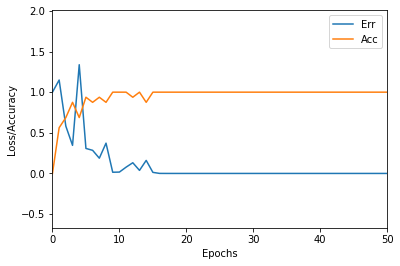

In [ ]:
print("Ploting training loss ...")
plt.plot(errLoss, label="Err")
plt.plot(accLoss, label="Acc")
plt.xlim([0, len(errLoss)-1])
plt.legend(loc='upper right')
plt.ylabel('Loss/Accuracy')
plt.xlabel('Epochs')
plt.margins(0.5, 0.5)
plt.show()

In [ ]:
tabela_resultados = pd.DataFrame({'Tipo de Predição':['Acurácia']})

Aqui vamos ter o resultado do nosso primeiro modelo.

In [ ]:
print("Testing the model ...")
acc = model.evaluate(X_test, y_test, batch_size=batchSize)
#print(model.metrics_names)
print("\tTop-1 Accuracy: %f" % acc[1])
tabela_resultados['Diretamente pela rede'] = acc[1]

Testing the model ...
5/5 [==============================] - 2s 163ms/step - loss: 0.5709 - accuracy: 0.8700
	Top-1 Accuracy: 0.870000


##b)
**Compare a predição diretamente pela rede com a extração de características** (0,5 ponto).

R: vou pegar o modelo usado no projeto de extração de caracteristicas, usando o Naive Bayes, como comparação.

In [ ]:
# Separar o dado em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=10)

In [ ]:
print("Loading the VGG19-ImageNet model ...")
model = VGG19(include_top=True, weights='imagenet', input_shape=(224, 224, 3), classes=1000,classifier_activation="softmax",pooling='max') 
model = Model(inputs=model.input, outputs=model.get_layer(index=-2).output)
model.summary()

Loading the VGG19-ImageNet model ...
574726144/574710816 [==============================] - 3s 0us/step
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                     

In [ ]:
prediction = np.array(model.predict(X_train))
#X_train = np.reshape(prediction, (prediction.shape[0], (prediction.shape[1]*prediction.shape[2]*prediction.shape[3])))
X_train = np.reshape(prediction, (prediction.shape[0], prediction.shape[1]))

prediction = np.array(model.predict(X_test))
#X_test = np.reshape(prediction, (prediction.shape[0], (prediction.shape[1]*prediction.shape[2]*prediction.shape[3])))
X_test = np.reshape(prediction, (prediction.shape[0], prediction.shape[1]))

print('\tFeatures training shape: ', X_train.shape)
print('\tFeatures testing shape: ', X_test.shape)

	Features training shape:  (400, 4096)
	Features testing shape:  (100, 4096)


In [ ]:
print("Classification with Naive Bayes ...")
NB = MultinomialNB(alpha=1.5)
NB.fit(X_train,np.ravel(y_train, order='C'))
result = NB.predict(X_test)

acc = accuracy_score(result, y_test)
print("\tAccuracy Linear KNN: %0.4f" % acc)
tabela_resultados['Extração de Caracteristicas'] = acc

Classification with Naive Bayes ...
	Accuracy Linear KNN: 0.7000


In [ ]:
tabela_resultados.T

,0
Tipo de Predição,Acurácia
Diretamente pela rede,0.87
Extração de Caracteristicas,0.7


Podemos perceber que os resutlados obtidos pela rede diretamente foram bem melhores.

# Questão 2)
**Considerando a mesma rede pré-treinada do exercício anterior, faça fine-tuning congelando algumas camadas. Determine a quantidade de camadas a serem congeladas, indique o setup escolhido e compare o resultado obtido em relação ao fine-tuning convencional.** (2,5 pontos)

In [ ]:
# Separar o dado em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=10)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print('\tTraining set shape: ', X_train.shape)
print('\tTesting set shape: ', X_test.shape)
print('\tTraining label shape: ', y_train.shape)
print('\tTesting label shape: ', y_test.shape)

	Training set shape:  (400, 224, 224, 3)
	Testing set shape:  (100, 224, 224, 3)
	Training label shape:  (400, 5)
	Testing label shape:  (100, 5)


Congelaremos 10 camadas para fazer este experimento.

In [ ]:
#congelando as camadas

print("Loading the ResNet50-ImageNet model")
model = resnet50.ResNet50(input_shape=(224, 224, 3), weights='imagenet', include_top=True, pooling='max',classifier_activation="softmax")
model = Model(inputs=model.input, outputs=model.get_layer(index=-7).output)

print("\tAdding new layers to the model ...")
newTop = Sequential()
newTop.add(Flatten(input_shape=model.output_shape[1:]))
newTop.add(Dense(5, activation='softmax'))

print('\tSet fine-tuning configuration...')
model = Model(inputs=model.input, outputs=newTop(model.output))

for layer in model.layers[:-int(10)]:
  layer.trainable = False

for layer in model.layers:
  print(layer,layer.trainable)

optimizer = 'adam'
model.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])
#model.summary()

Loading the ResNet50-ImageNet model
	Adding new layers to the model ...
	Set fine-tuning configuration...
<keras.engine.input_layer.InputLayer object at 0x7fa3e3182810> False
<keras.layers.convolutional.ZeroPadding2D object at 0x7fa3512e9f90> False
<keras.layers.convolutional.Conv2D object at 0x7fa35126d1d0> False
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7fa351317350> False
<keras.layers.core.activation.Activation object at 0x7fa35126de90> False
<keras.layers.convolutional.ZeroPadding2D object at 0x7fa33e089910> False
<keras.layers.pooling.MaxPooling2D object at 0x7fa351286710> False
<keras.layers.convolutional.Conv2D object at 0x7fa35127cc90> False
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7fa35129b410> False
<keras.layers.core.activation.Activation object at 0x7fa35127ba50> False
<keras.layers.convolutional.Conv2D object at 0x7fa3512f2510> False
<keras.layers.normalization.batch_normalization.BatchNormalizatio

In [ ]:
batchSize = 24
numberEpochs = 50

print("Training the model ...")
batches = list(range(0, len(y_train), batchSize))
perm = np.random.permutation(len(y_train))

errLoss = []
accLoss = []
errLoss.append(1)
accLoss.append(0)

for e in range(0, numberEpochs):
    for b in batches:
        if b + batchSize < len(y_train):
            X1 = X_train[perm[b : b + batchSize]]
            y1 = y_train[perm[b : b + batchSize]]
        else:
            X1 = X_train[perm[b : ]]
            y1 = y_train[perm[b : ]]
        loss = model.train_on_batch(X1, y1)

    print("\tEpoch %i. [Error, Accuracy]: %.15f, %.15f " % (e+1, loss[0], loss[1]))
    errLoss.append(loss[0])
    accLoss.append(loss[1])

errLossCongelando_Camadas = errLoss
accLossCongelando_Camadas = accLoss

Training the model ...
	Epoch 1. [Error, Accuracy]: 0.649004876613617, 0.750000000000000 
	Epoch 2. [Error, Accuracy]: 0.149448260664940, 0.937500000000000 
	Epoch 3. [Error, Accuracy]: 0.027459587901831, 1.000000000000000 
	Epoch 4. [Error, Accuracy]: 0.006707792170346, 1.000000000000000 
	Epoch 5. [Error, Accuracy]: 0.000607439083979, 1.000000000000000 
	Epoch 6. [Error, Accuracy]: 0.000909593596589, 1.000000000000000 
	Epoch 7. [Error, Accuracy]: 0.000212559301872, 1.000000000000000 
	Epoch 8. [Error, Accuracy]: 0.000336116179824, 1.000000000000000 
	Epoch 9. [Error, Accuracy]: 0.000151856482262, 1.000000000000000 
	Epoch 10. [Error, Accuracy]: 0.000103370766737, 1.000000000000000 
	Epoch 11. [Error, Accuracy]: 0.000085720341303, 1.000000000000000 
	Epoch 12. [Error, Accuracy]: 0.000076693220763, 1.000000000000000 
	Epoch 13. [Error, Accuracy]: 0.000070503556344, 1.000000000000000 
	Epoch 14. [Error, Accuracy]: 0.000065438463935, 1.000000000000000 
	Epoch 15. [Error, Accuracy]: 0.00

In [ ]:
print("Testing the model ...")
acc = model.evaluate(X_test, y_test, batch_size=batchSize)
#print(model.metrics_names)
print("\tTop-1 Accuracy: %f" % acc[1])
tabela_resultados['Congelando Camadas'] = acc[1]

Testing the model ...
5/5 [==============================] - 1s 64ms/step - loss: 0.5942 - accuracy: 0.8600
	Top-1 Accuracy: 0.860000


In [ ]:
tabela_resultados.T

,0
Tipo de Predição,Acurácia
Diretamente pela rede,0.87
Extração de Caracteristicas,0.7
Congelando Camadas,0.86


Podemos verificar que para este caso o congelamento não melhorou o nosso modelo, na verdade piorou. Talvez por ser um dataset de experimento o congelamento não ajude, mas com certeza será útil em outros projetos.

#Questão 3)
**Considerando a mesma rede pré-treinada do primeiro exercício, faça fine-tuning com Data Augmentation. Explore essas técnicas e verifique se sua utilização melhora a performance do modelo. Não fique restrito às técnicas de exemplo. Estude as demais funções existentes no pacote ImageGenerator.** (2,5 pontos)


In [ ]:
# Separar o dado em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=10)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print('\tTraining set shape: ', X_train.shape)
print('\tTesting set shape: ', X_test.shape)
print('\tTraining label shape: ', y_train.shape)
print('\tTesting label shape: ', y_test.shape)

	Training set shape:  (400, 224, 224, 3)
	Testing set shape:  (100, 224, 224, 3)
	Training label shape:  (400, 5)
	Testing label shape:  (100, 5)


In [ ]:
#utilizando o ImageDataGenerator

def kerasAugmentation(X, Y, augmentation, qtdade):
  print("\tCreating data augmentation usign Keras ...")
  
  # determinando o gerador das imagens a ser utilizado e sua configuração
  if (augmentation == "Rotation"):
    datagen = ImageDataGenerator(rotation_range=90)
  elif (augmentation == "Shift"):
    datagen = ImageDataGenerator(width_shift_range=0.2, height_shift_range=0.2)
  elif (augmentation == "Flip"):
    datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)
    
  images = []
  labels = []

  for i in range(0, X.shape[0]):
    it = datagen.flow(np.expand_dims(X[i], 0), batch_size=1) # passamos 1 imagem por vez
    for j in range(0, qtdade):
      batch = it.next() # selecionamos a próxima imagem gerada
      images.append(batch[0].astype(np.uint8)) # convertemos esta imagem na codificação adequada para o nosso conjunto de dados
      labels.append(Y[i])
      
  images = np.array(images)
  labels = np.array(labels)
  return images, labels

# chamada da função; após, concatenamos os dados gerados aos dados originais
images, labels = kerasAugmentation(X_train, y_train, "Shift", 2)
X_train = np.concatenate((X_train, images), axis=0)
y_train = np.concatenate((y_train, labels), axis=0)

print('\tTraining set shape: ', X_train.shape)
print('\tTesting set shape: ', X_test.shape)
print('\tTraining label shape: ', y_train.shape)
print('\tTesting label shape: ', y_test.shape)

	Creating data augmentation usign Keras ...
	Training set shape:  (1200, 224, 224, 3)
	Testing set shape:  (100, 224, 224, 3)
	Training label shape:  (1200, 5)
	Testing label shape:  (100, 5)


In [ ]:
print("Loading the ResNet50-ImageNet model")
model = resnet50.ResNet50(input_shape=(224, 224, 3), weights='imagenet', include_top=True, pooling='max',classifier_activation="softmax")
model = Model(inputs=model.input, outputs=model.get_layer(index=-7).output)


print("\tAdding new layers to the model ...")
newTop = Sequential()
newTop.add(Flatten(input_shape=model.output_shape[1:]))
newTop.add(Dense(5, activation='softmax'))

print("\tSet fine-tuning configuration...")
model = Model(inputs=model.input, outputs=newTop(model.output))
model.summary()

optimizer = 'adam'
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

Loading the ResNet50-ImageNet model
	Adding new layers to the model ...
	Set fine-tuning configuration...
Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_4[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                    

In [ ]:
batchSize = 24
numberEpochs = 50

print("Training the model ...")
batches = list(range(0, len(y_train), batchSize))
perm = np.random.permutation(len(y_train))

errLoss = []
accLoss = []
errLoss.append(1)
accLoss.append(0)

for e in range(0, numberEpochs):
    for b in batches:
        if b + batchSize < len(y_train):
            X1 = X_train[perm[b : b + batchSize]]
            y1 = y_train[perm[b : b + batchSize]]
        else:
            X1 = X_train[perm[b : ]]
            y1 = y_train[perm[b : ]]
        loss = model.train_on_batch(X1, y1)

    print("\tEpoch %i. [Error, Accuracy]: %.15f, %.15f " % (e+1, loss[0], loss[1]))
    errLoss.append(loss[0])
    accLoss.append(loss[1])

errLossImageDataGenerator = errLoss
accLossImageDataGenerator = accLoss

Training the model ...
	Epoch 1. [Error, Accuracy]: 0.834293305873871, 0.750000000000000 
	Epoch 2. [Error, Accuracy]: 0.408083796501160, 0.875000000000000 
	Epoch 3. [Error, Accuracy]: 0.460124015808105, 0.875000000000000 
	Epoch 4. [Error, Accuracy]: 0.201200202107430, 0.916666686534882 
	Epoch 5. [Error, Accuracy]: 0.201003745198250, 0.916666686534882 
	Epoch 6. [Error, Accuracy]: 0.188754498958588, 0.958333313465118 
	Epoch 7. [Error, Accuracy]: 0.157296881079674, 0.958333313465118 
	Epoch 8. [Error, Accuracy]: 0.021992675960064, 1.000000000000000 
	Epoch 9. [Error, Accuracy]: 0.055454563349485, 1.000000000000000 
	Epoch 10. [Error, Accuracy]: 0.094872049987316, 0.958333313465118 
	Epoch 11. [Error, Accuracy]: 0.067802891135216, 1.000000000000000 
	Epoch 12. [Error, Accuracy]: 0.031726222485304, 1.000000000000000 
	Epoch 13. [Error, Accuracy]: 0.007204356137663, 1.000000000000000 
	Epoch 14. [Error, Accuracy]: 0.015218399465084, 1.000000000000000 
	Epoch 15. [Error, Accuracy]: 0.00

In [ ]:
print("Testing the model ...")
acc = model.evaluate(X_test, y_test, batch_size=batchSize)
#print(model.metrics_names)
print("\tTop-1 Accuracy: %f" % acc[1])
tabela_resultados['ImageDataGenerator'] = acc[1]

Testing the model ...
5/5 [==============================] - 1s 64ms/step - loss: 0.0877 - accuracy: 0.9800
	Top-1 Accuracy: 0.980000


In [ ]:
tabela_resultados.T

,0
Tipo de Predição,Acurácia
Diretamente pela rede,0.87
Extração de Caracteristicas,0.7
Congelando Camadas,0.86
ImageDataGenerator,0.98


Aqui então temos o nosso melhor modelo, usando o ImageDataGenerator com 2 vezes mais imagens para fazer os testes. Muito interessante este método pois pode ajudar muitos datasets que não são balanceados, isso facilita para o modelo predizer novas imagens.

#Questão 4) 
**Interpretação dos resultados** (2,5 pontos):





##a) 
**Baseando-se nos experimetnos anteriores, indique a melhor solução para este conjunto de dados.**


Fazendo testes e comparações chegamos a conclusão que a melhor solução foi fazer diretamente pela rede gerando mais imagens. No nosso experimento ImageDataGenerator tivemos a melhor acurácia.

##b) 
**Apresente gráficos e dados comparativos que justifiquem suas escolhas.**

Gráfico dos resultados das epocas dos 3 métodos diretamente pela rede aprendidos.

Ploting training lossPela_Rede ...
Ploting training lossCongelando_Camadas ...
Ploting training lossImageDataGenerator ...


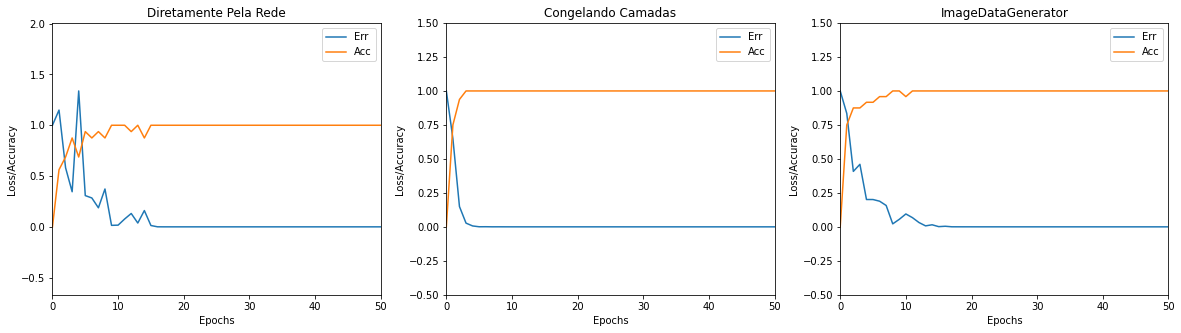

In [ ]:
plt.figure(figsize=(20,5))

plt.subplot(1, 3, 1) 
print("Ploting training lossPela_Rede ...")
plt.plot(errLossPela_Rede, label="Err")
plt.plot(accLossPela_Rede, label="Acc")
plt.xlim([0, len(errLossPela_Rede)-1])
plt.legend(loc='upper right')
plt.title('Diretamente Pela Rede')
plt.ylabel('Loss/Accuracy')
plt.xlabel('Epochs')
plt.margins(0.5, 0.5)

plt.subplot(1, 3, 2) 
print("Ploting training lossCongelando_Camadas ...")
plt.plot(errLossCongelando_Camadas, label="Err")
plt.plot(accLossCongelando_Camadas, label="Acc")
plt.xlim([0, len(errLossCongelando_Camadas)-1])
plt.legend(loc='upper right')
plt.title('Congelando Camadas')
plt.ylabel('Loss/Accuracy')
plt.xlabel('Epochs')
plt.margins(0.5, 0.5)

plt.subplot(1, 3, 3) 
print("Ploting training lossImageDataGenerator ...")
plt.plot(errLossImageDataGenerator, label="Err")
plt.plot(accLossImageDataGenerator, label="Acc")
plt.xlim([0, len(errLossImageDataGenerator)-1])
plt.legend(loc='upper right')
plt.title('ImageDataGenerator')
plt.ylabel('Loss/Accuracy')
plt.xlabel('Epochs')
plt.margins(0.5, 0.5)
plt.show()

Aqui podemos ver os resultados em uma tabela para facilitar a nossa vizualização.

In [ ]:
tabela_resultados.T

,0
Tipo de Predição,Acurácia
Diretamente pela rede,0.87
Extração de Caracteristicas,0.7
Congelando Camadas,0.86
ImageDataGenerator,0.98


Agora vamos poder ver em gráfico estes mesmos resultados.

In [ ]:
metod = tabela_resultados.columns
acurac = [tabela_resultados.iloc[0,1],tabela_resultados.iloc[0,2],tabela_resultados.iloc[0,3],tabela_resultados.iloc[0,4]]

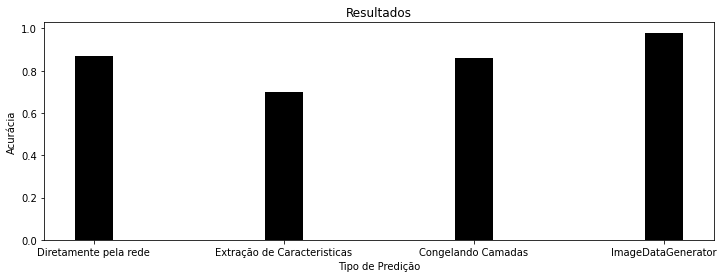

In [ ]:
plt.figure(figsize=(12,4))

plt.bar(metod[1:5],acurac, width=0.2, color='black')
plt.title('Resultados')
plt.xlabel('Tipo de Predição')
plt.ylabel('Acurácia')
plt.show()